In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from IPython.display import display

In [2]:
# Função para converter nanômetros em RGB
def nm_to_rgb(wavelength):
    Gamma = 0.80
    IntensityMax = 255
    factor, red, green, blue = 0, 0, 0, 0

    if 380 <= wavelength < 440:
        red = -(wavelength - 440) / (440 - 380)
        green = 0.0
        blue = 1.0
    elif 440 <= wavelength < 490:
        red = 0.0
        green = (wavelength - 440) / (490 - 440)
        blue = 1.0
    elif 490 <= wavelength < 510:
        red = 0.0
        green = 1.0
        blue = -(wavelength - 510) / (510 - 490)
    elif 510 <= wavelength < 580:
        red = (wavelength - 510) / (580 - 510)
        green = 1.0
        blue = 0.0
    elif 580 <= wavelength < 645:
        red = 1.0
        green = -(wavelength - 645) / (645 - 580)
        blue = 0.0
    elif 645 <= wavelength < 781:
        red = 1.0
        green = 0.0
        blue = 0.0
    else:
        red = 0.0
        green = 0.0
        blue = 0.0

    if 380 <= wavelength < 420:
        factor = 0.3 + 0.7 * (wavelength - 380) / (420 - 380)
    elif 420 <= wavelength < 701:
        factor = 1.0
    elif 701 <= wavelength < 781:
        factor = 0.3 + 0.7 * (780 - wavelength) / (780 - 700)
    else:
        factor = 0.0

    if red != 0:
        red = IntensityMax * (red * factor) ** Gamma
    if green != 0:
        green = IntensityMax * (green * factor) ** Gamma
    if blue != 0:
        blue = IntensityMax * (blue * factor) ** Gamma

    return red, green, blue

In [3]:
# Definindo a faixa de frequência desejada (em nanômetros)
x1 = 450
x2 = 500

In [4]:
# Criando arrays para armazenar os valores
wavelengths = np.arange(x1, x2 + 1)
colors = np.array([nm_to_rgb(wavelength) for wavelength in wavelengths])

In [5]:
# Calculando a integral para cada componente de cor (r, g, b)
integral_r = simps(colors[:, 0], wavelengths)
integral_g = simps(colors[:, 1], wavelengths)
integral_b = simps(colors[:, 2], wavelengths)

In [6]:
# Calculando a fração em relação ao valor máximo
max_integral = 255 * (x2 - x1 + 1)
fraction_r = integral_r / max_integral
fraction_g = integral_g / max_integral
fraction_b = integral_b / max_integral

In [7]:
print("Integral de Red (r):", integral_r)
print("Integral de Green (g):", integral_g)
print("Integral de Blue (b):", integral_b)
print("Fração da integral em relação ao máximo (r):", fraction_r*255)
print("Fração da integral em relação ao máximo (g):", fraction_g*255)
print("Fração da integral em relação ao máximo (b):", fraction_b*255)
#print("Fração da integral em relação ao máximo (r):", (integral_r/(255*(x2-x1)))*(255/0.5967855786976078))
#print("Fração da integral em relação ao máximo (g):", (integral_g/(255*(x2-x1)))*(255/0.384700161557238))
#print("Fração da integral em relação ao máximo (b):", (integral_b/(255*(x2-x1)))*(255/0.27305049698625633))

Integral de Red (r): 0.0
Integral de Green (g): 9242.409856985872
Integral de Blue (b): 12219.671877530505
Fração da integral em relação ao máximo (r): 0.0
Fração da integral em relação ao máximo (g): 181.2237226859975
Fração da integral em relação ao máximo (b): 239.60140936334327


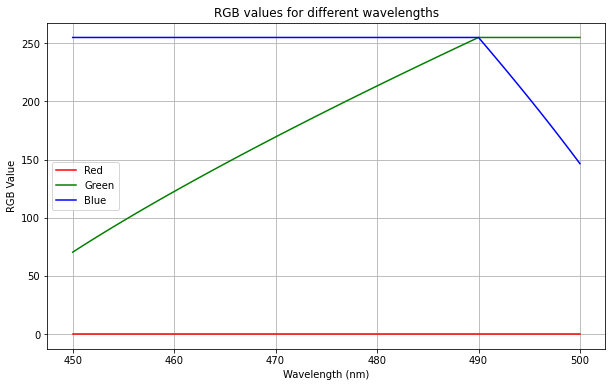

In [8]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, colors[:, 0], 'r', label='Red')
plt.plot(wavelengths, colors[:, 1], 'g', label='Green')
plt.plot(wavelengths, colors[:, 2], 'b', label='Blue')
plt.xlabel('Wavelength (nm)')
plt.ylabel('RGB Value')
plt.title('RGB values for different wavelengths')
plt.legend()
plt.grid(True)
plt.show()

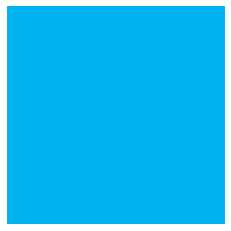

In [9]:
def show_color(r, g, b):
    color = [r, g, b]  # Normaliza os valores RGB para o intervalo [0, 1]
    plt.imshow([[color]], extent=[0, 1, 0, 1])
    plt.axis('off')
    plt.show()
show_color(fraction_r, fraction_g, fraction_b)